In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 读取数据
df = pd.read_csv("F:/Desktop/diabetes/diabetes.csv")

# 查看数据
print(df.shape)
print(df.head())
print(df.describe())
print(df.info())

# 检查“0”是否代表缺失值的列
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_features:
    print(f"{col} 中为 0 的数量：{(df[col] == 0).sum()}")

# 将 0 替换为缺失值 NaN
df[zero_features] = df[zero_features].replace(0, np.nan)

# 使用中位数填补缺失值
imputer = SimpleImputer(strategy="median")
df[zero_features] = imputer.fit_transform(df[zero_features])

# 标准化数据（除了Outcome）
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 拆分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

print("训练集维度：", X_train.shape)
print("测试集维度：", X_test.shape)


(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.

In [2]:
# 设置图像风格
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

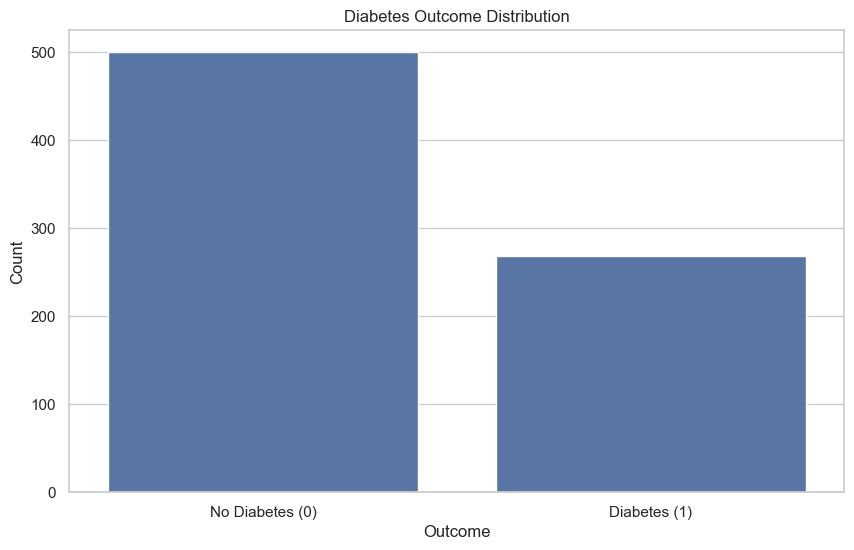

In [3]:
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Distribution')
plt.xticks([0,1], ['No Diabetes (0)', 'Diabetes (1)'])
plt.ylabel('Count')
plt.show()

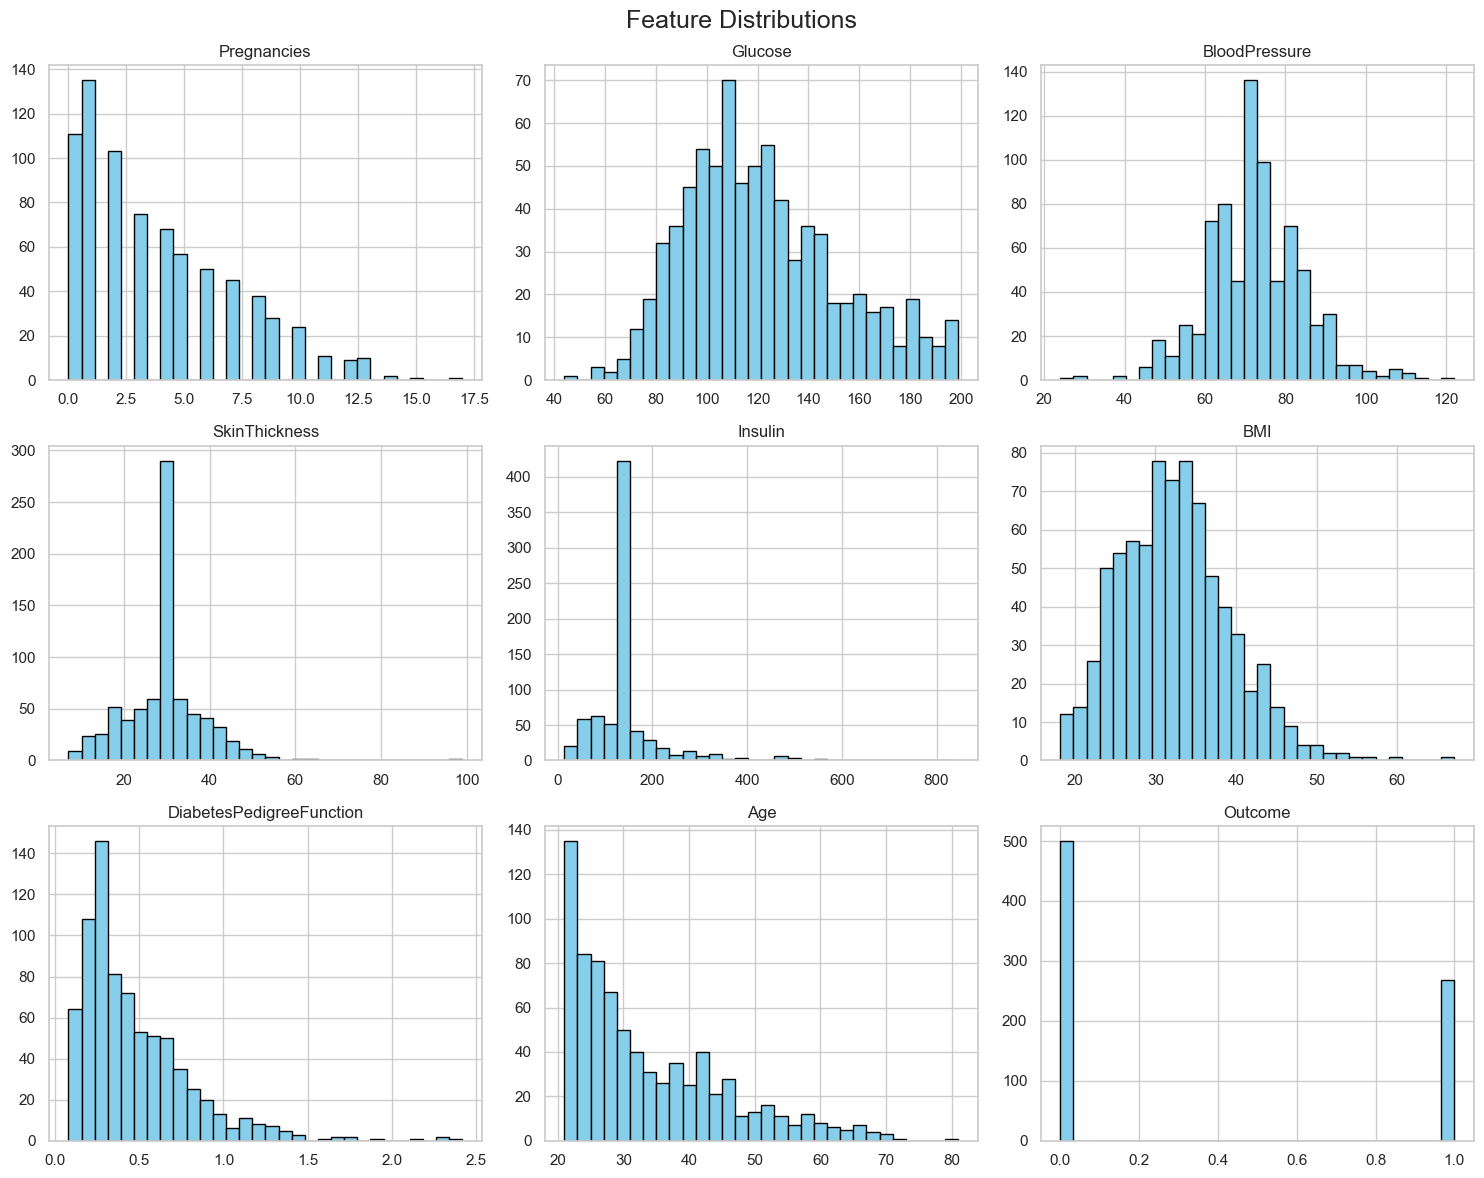

In [4]:
df.hist(bins=30, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=18)
plt.tight_layout()
plt.show()

C:\Users\chenmiaoying\AppData\Local\Temp\ipykernel_8064\905298344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette='Set2')


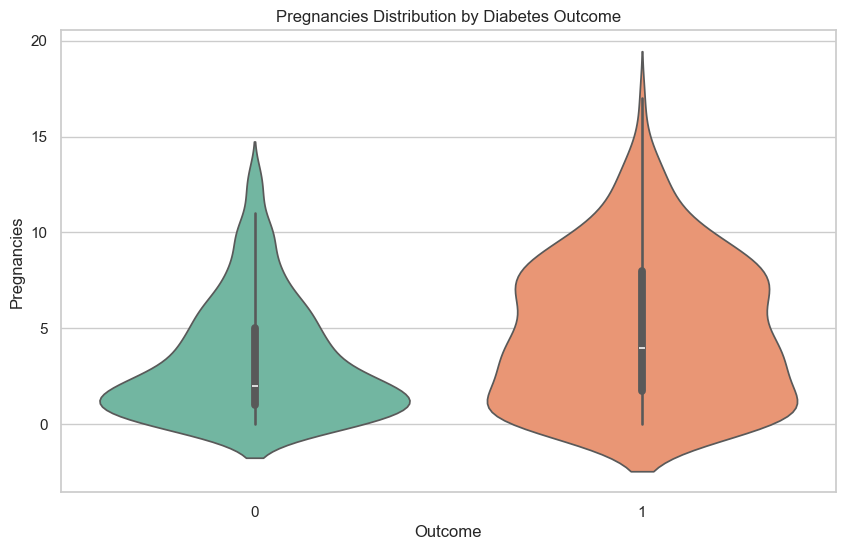

C:\Users\chenmiaoying\AppData\Local\Temp\ipykernel_8064\905298344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette='Set2')


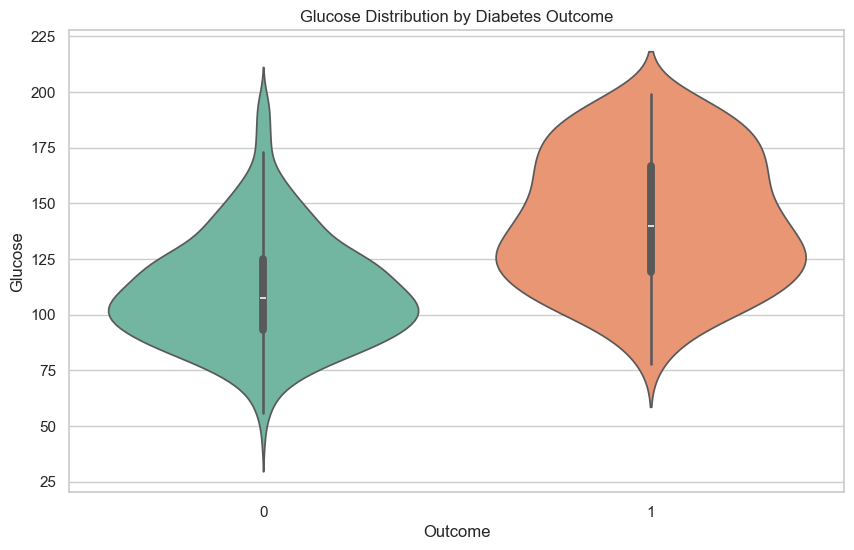

C:\Users\chenmiaoying\AppData\Local\Temp\ipykernel_8064\905298344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette='Set2')


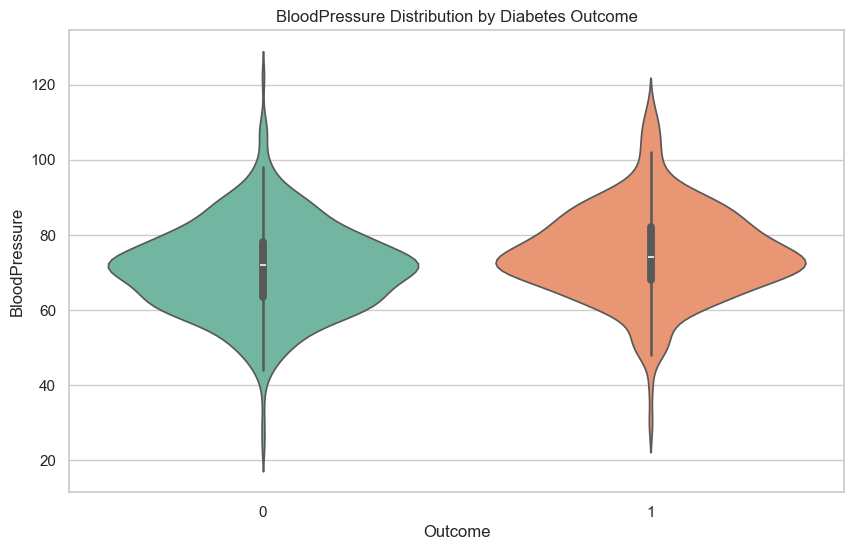

C:\Users\chenmiaoying\AppData\Local\Temp\ipykernel_8064\905298344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette='Set2')


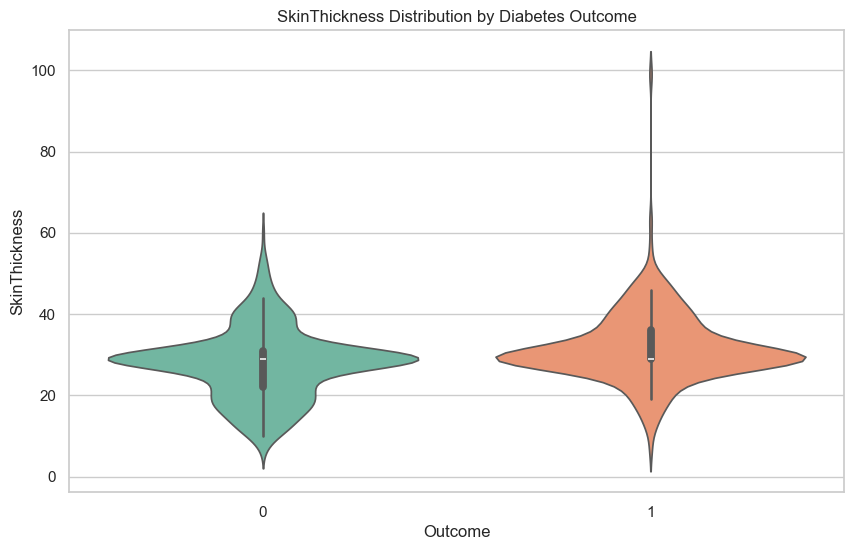

C:\Users\chenmiaoying\AppData\Local\Temp\ipykernel_8064\905298344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette='Set2')


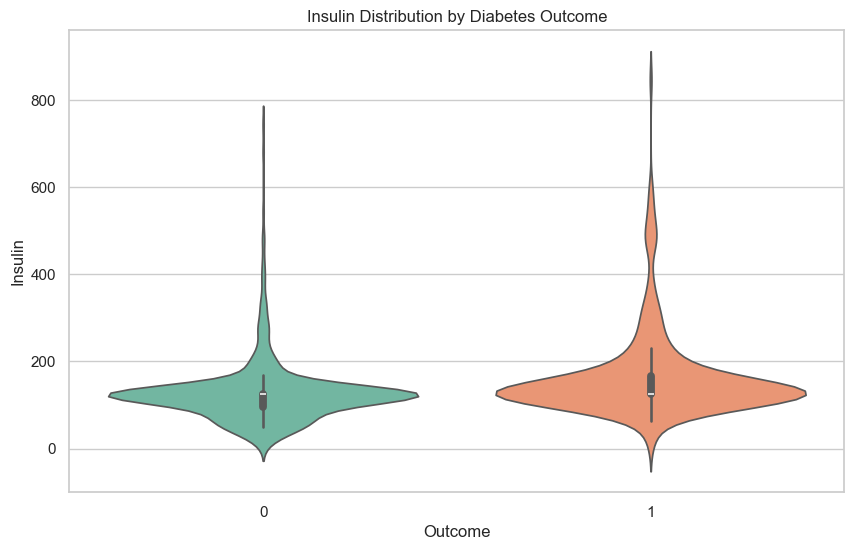

C:\Users\chenmiaoying\AppData\Local\Temp\ipykernel_8064\905298344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette='Set2')


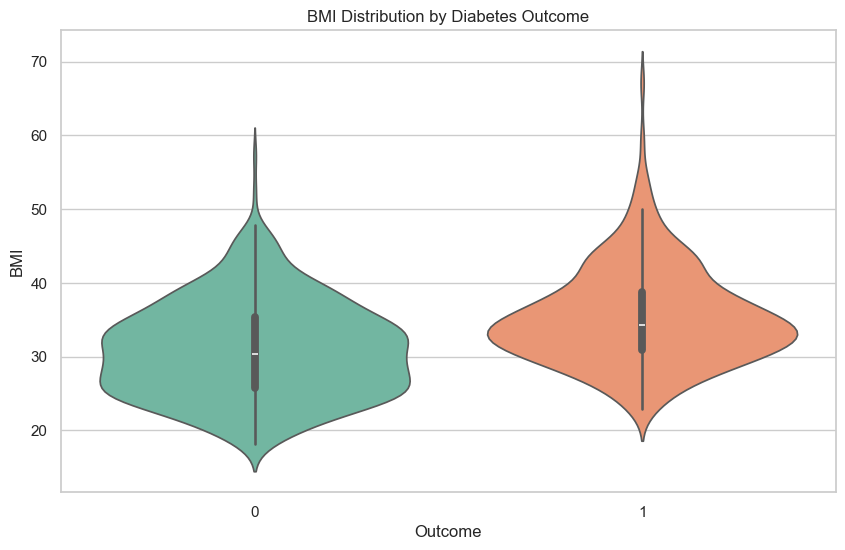

C:\Users\chenmiaoying\AppData\Local\Temp\ipykernel_8064\905298344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette='Set2')


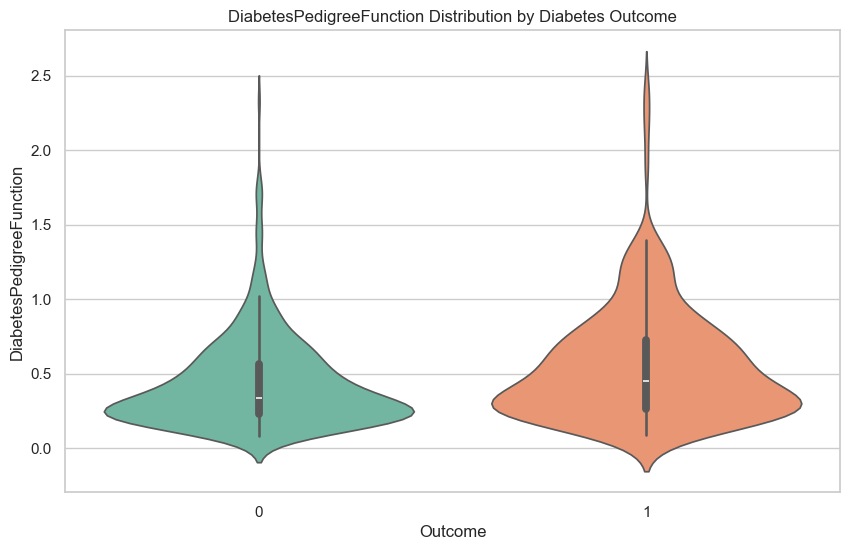

C:\Users\chenmiaoying\AppData\Local\Temp\ipykernel_8064\905298344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette='Set2')


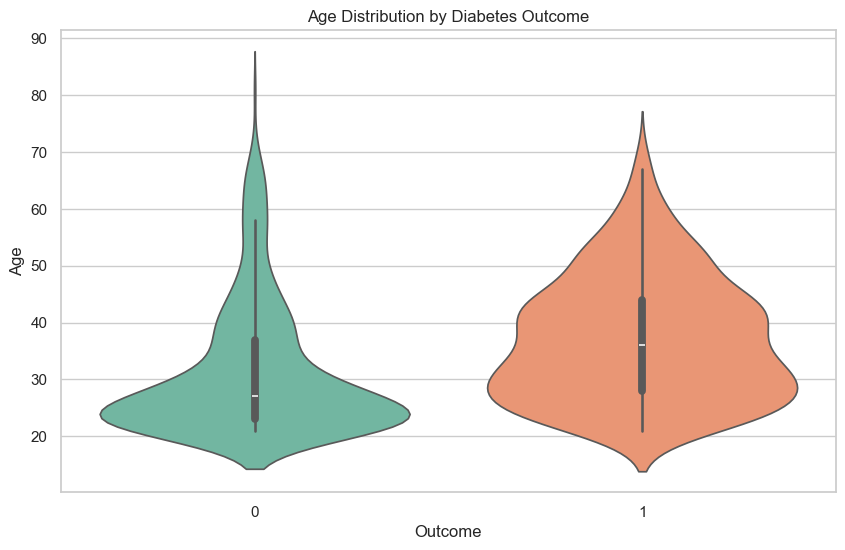

In [5]:
features = df.columns[:-1]  # 不包括 Outcome

for col in features:
    plt.figure()
    sns.violinplot(x='Outcome', y=col, data=df, palette='Set2')
    plt.title(f'{col} Distribution by Diabetes Outcome')
    plt.show()

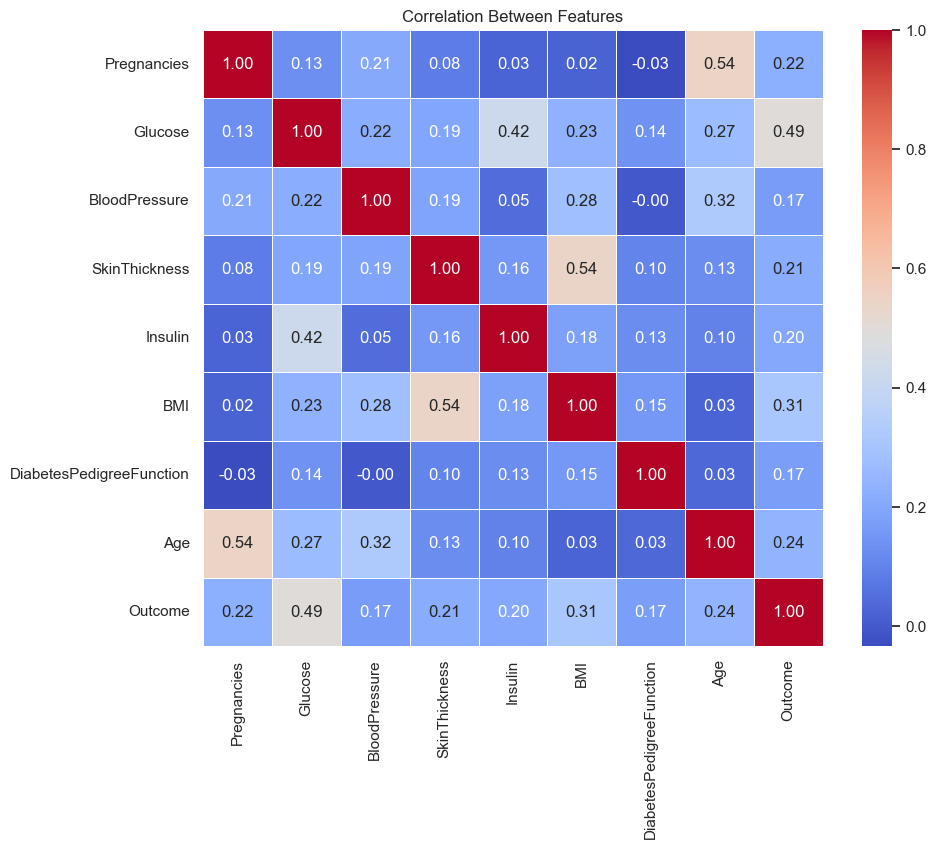

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Features")
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 初始化并训练模型
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# 预测
y_pred = lr_model.predict(X_test)
y_prob = lr_model.predict_proba(X_test)[:, 1]


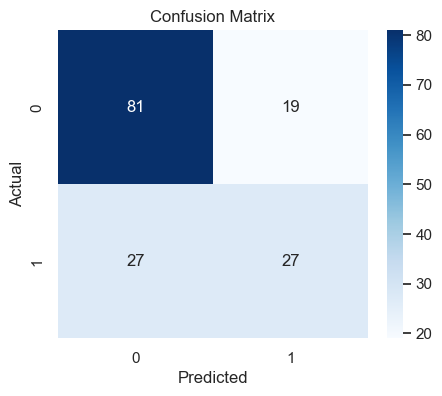

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

AUC-ROC: 0.8127777777777777


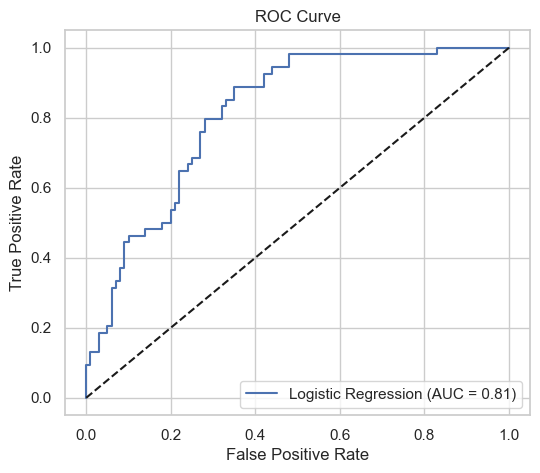

In [8]:
# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 分类报告
print("Classification Report:\n", classification_report(y_test, y_pred))

# AUC-ROC 分数
auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", auc)

# 画出 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
# 逻辑回归

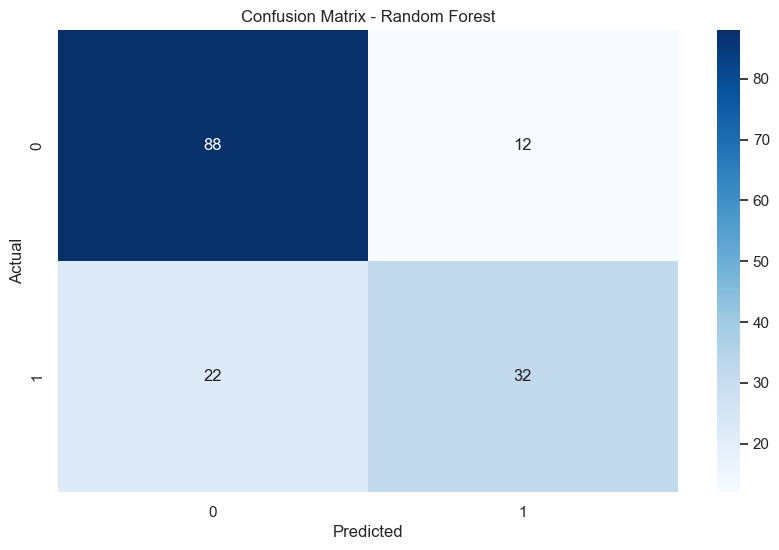

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154

AUC-ROC: 0.8190740740740741


In [9]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# 初始化并训练模型
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 预测
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# 混淆矩阵
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 报告和 AUC
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_rf))


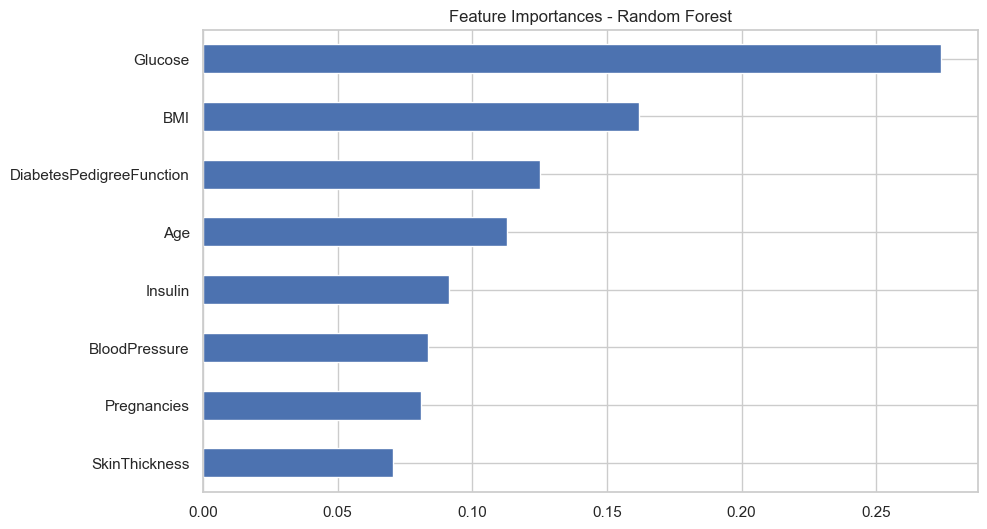

In [10]:
# 特征重要性
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importances - Random Forest")
plt.show()

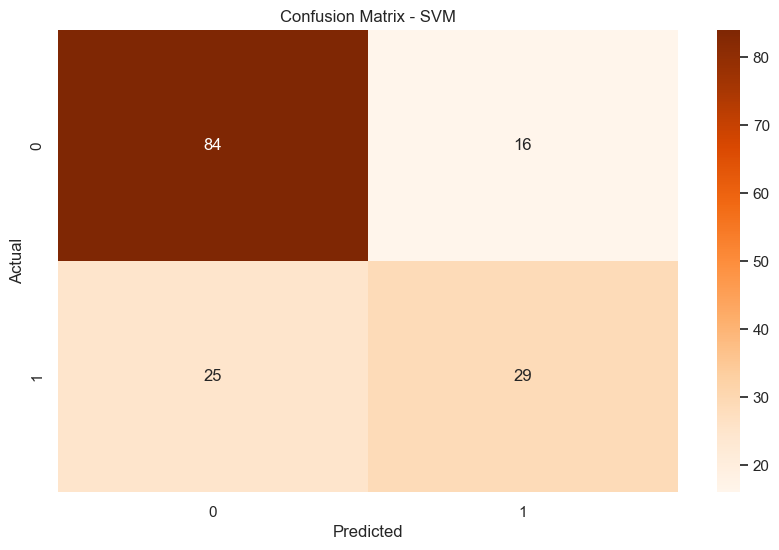

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154

AUC-ROC: 0.7962962962962963


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# 创建并训练模型
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# 预测
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# 混淆矩阵
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 报告与AUC
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_svm))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

AUC-ROC: 0.8081481481481482
混淆矩阵：
    0   1
0  84  16
1  21  33


F:\python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:38:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


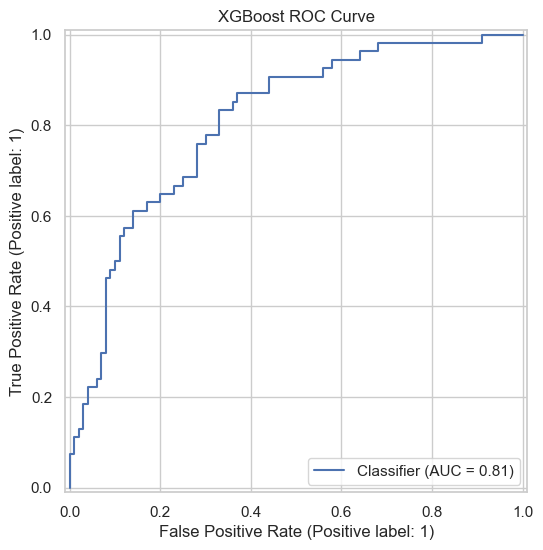

In [12]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay

# 建立模型
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 训练
xgb_model.fit(X_train, y_train)

# 预测
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# 评估
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("混淆矩阵：")
print(pd.DataFrame(cm))

# AUC曲线图
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title('XGBoost ROC Curve')
plt.show()


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt_model = GradientBoostingClassifier(random_state=42)
gbdt_model.fit(X_train, y_train)

# 预测
y_pred = gbdt_model.predict(X_test)
y_proba = gbdt_model.predict_proba(X_test)[:, 1]

# 输出结果
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154

AUC-ROC: 0.8305555555555556


In [18]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "GBDT": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {"Model": [], "Accuracy": [], "AUC": []}

for name, model in models.items():
    acc = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    auc = cross_val_score(model, X_scaled, y, cv=cv, scoring='roc_auc')
    results["Model"].append(name)
    results["Accuracy"].append(acc.mean())
    results["AUC"].append(auc.mean())

F:\python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:53:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
F:\python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:53:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
F:\python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:53:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
F:\python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:53:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
F:\python311\Lib\sit

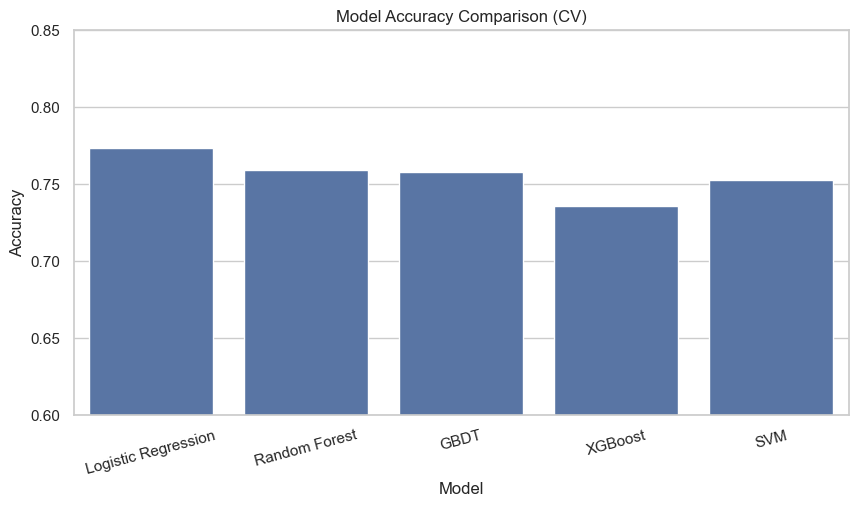

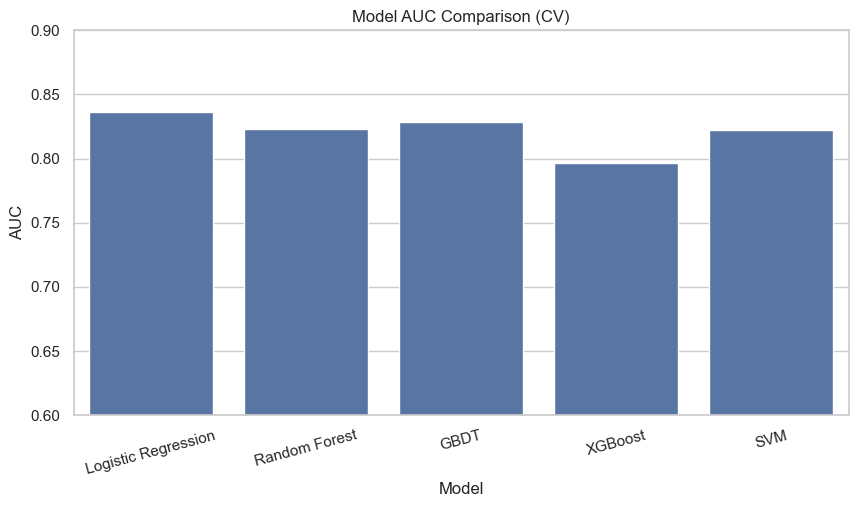

                 Model  Accuracy       AUC
0  Logistic Regression  0.773398  0.836627
1        Random Forest  0.759053  0.822677
2                 GBDT  0.757737  0.828358
3              XGBoost  0.735583  0.796471
4                  SVM  0.752568  0.822600


In [19]:
result_df = pd.DataFrame(results)

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=result_df)
plt.title("Model Accuracy Comparison (CV)")
plt.ylim(0.6, 0.85)
plt.xticks(rotation=15)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="AUC", data=result_df)
plt.title("Model AUC Comparison (CV)")
plt.ylim(0.6, 0.9)
plt.xticks(rotation=15)
plt.show()

print(result_df)
